In [53]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv('titanic_toy.csv')

In [4]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [7]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [18]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
# find Nan value with columns 
age_mean=x_train['Age'].mean()
age_median=x_train['Age'].median()

Fare_mean=x_train['Fare'].mean()
Fare_median=x_train['Fare'].median()

In [44]:
## Now Apply Menually nan value replace md
x_train['age_mean']=x_train['Age'].fillna(age_mean)
x_train['age_median']=x_train['Age'].fillna(age_median)


x_train['Fare_mean']=x_train['Age'].fillna(Fare_mean)
x_train['Fare_median']=x_train['Age'].fillna(Fare_median)

In [45]:
x_train

,Age,Fare,Family,age_mean,age_median,Fare_mean,Fare_median
331,45.5,28.5000,0,45.500000,45.5,45.500000,45.5
733,23.0,13.0000,0,23.000000,23.0,23.000000,23.0
382,32.0,7.9250,0,32.000000,32.0,32.000000,32.0
704,26.0,7.8542,1,26.000000,26.0,26.000000,26.0
813,6.0,31.2750,6,6.000000,6.0,6.000000,6.0
...,...,...,...,...,...,...,...
106,21.0,7.6500,0,21.000000,21.0,21.000000,21.0
270,NaN,31.0000,0,29.498846,28.0,32.517788,14.4
860,41.0,NaN,2,41.000000,41.0,41.000000,41.0
435,14.0,120.0000,3,14.000000,14.0,14.000000,14.0


In [48]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after median imputation: ', x_train['age_median'].var())
print('Age Variance after mean imputation: ', x_train['age_mean'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after median imputation: ', x_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', x_train['Fare_mean'].var())

Original Age variable variance:  210.2517072477438
Age Variance after median imputation:  169.20731007048096
Age Variance after mean imputation:  168.8519336687225
Original Fare variable variance:  2761.031434948639
Fare Variance after median imputation:  204.91494514688827
Fare Variance after mean imputation:  170.29366350002152


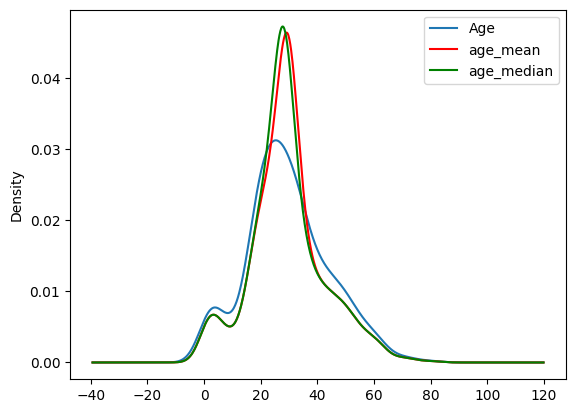

In [69]:
fig=plt.figure()
ax=fig.add_subplot(111)


# Original value Distribution with fare

x_train['Age'].plot(kind='kde',ax=ax)

# variable imputed with the median
x_train['age_mean'].plot(kind='kde', ax=ax, color='red')


# variable imputed with the mean
x_train['age_median'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

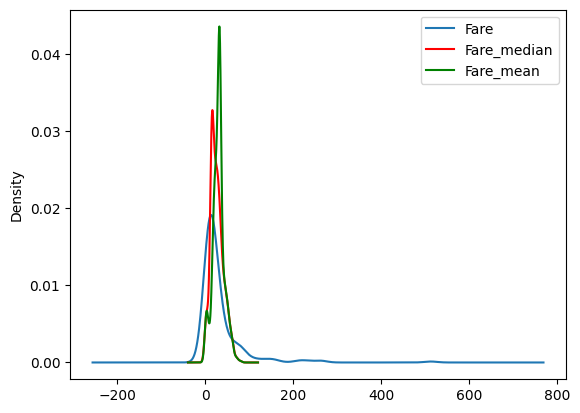

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [73]:
# Using Sk Learn 


In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [80]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [94]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [97]:
x=trf.fit(x_train)


ValueError: Specifying the columns using strings is only supported for dataframes.

In [90]:
x_train=trf.fit_transform(x_train)
x_test=trf.fit_transform(x_test)

ValueError: Specifying the columns using strings is only supported for dataframes.

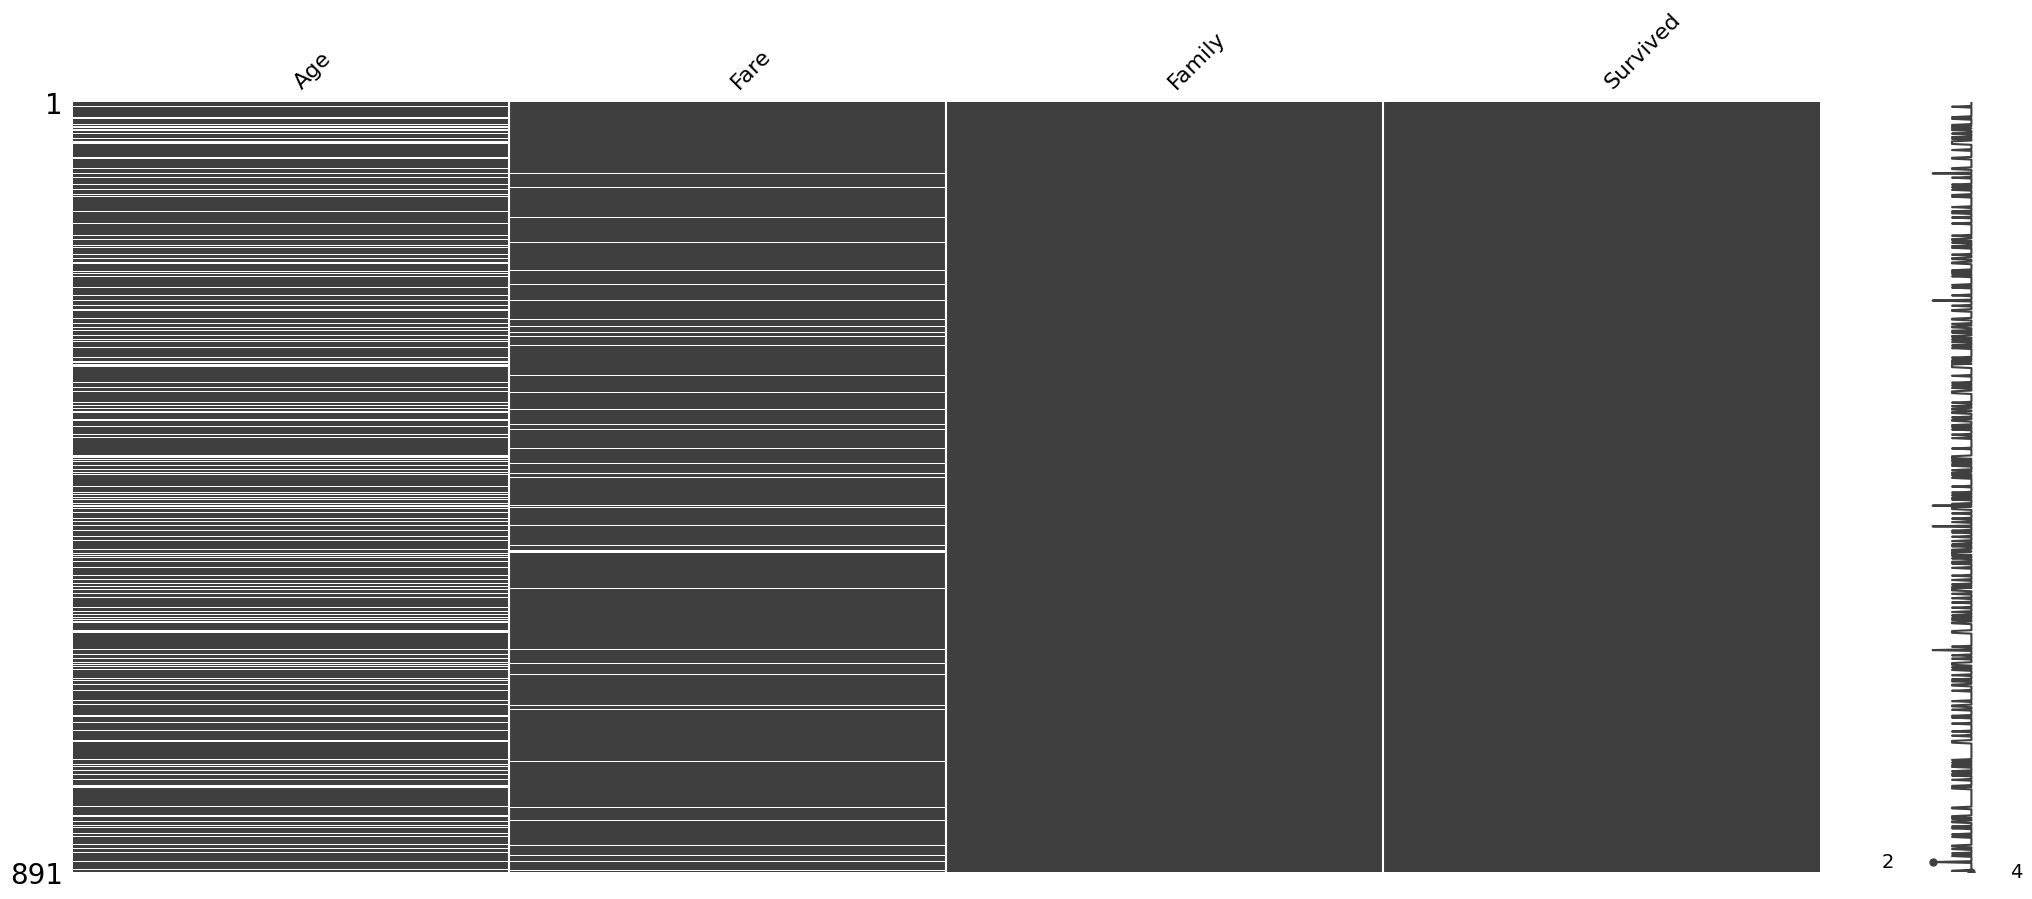

Age         177
Fare         45
Family        0
Survived      0
dtype: int64


In [6]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("titanic_toy.csv")

# Visualize missingness
msno.matrix(df)
#msno.bar(df)
plt.show()

# Check missingness pattern
print(df.isnull().sum())